# Scikit-learn

## 03 Model Selection (train_test_split(), 교차 검증)

## [ 학습/테스트 데이터 세트 분리 - train_test_split() ]

#### 필요한 Scikit-learn 모듈 로딩

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # train_test_split()

#### 1. 학습/테스트 데이터 세트를 분리하지 않고 예측 수행

In [2]:
iris = load_iris()   # 붓꽃 데이터 로드
dt_clf = DecisionTreeClassifier()   # DecisionTreeClassifier 객체 생성
train_data = iris.data   # 훈련 데이터 로드
train_label = iris.target   # 훈련 라벨 로드
dt_clf.fit(train_data, train_label)   # 훈련

# 학습 데이터 세트로 예측 수행 -> 모의고사로 수능치는 것
pred = dt_clf.predict(train_data)
print("예측 정확도 : ", accuracy_score(train_label, pred))

예측 정확도 :  1.0


#### 2. train_test_split()로 데이터 세트를 분리 후 예측 수행

In [6]:
iris_data = load_iris()

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                              test_size=0.3, random_state=121)

# 훈련
dt_clf.fit(X_train, y_train)

# 예측
pred = dt_clf.predict(X_test)

# 예측 정확도
print("예측 정확도 : {0: .4f}" .format(accuracy_score(y_test, pred)))

예측 정확도 :  0.9556


#### 3.  ndarray 뿐만 아니라 판다스 DataFrame/Series도 train_test_split()로 분리 가능

#### *DataFrame으로 변환*

In [8]:
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df["target"] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### *DataFrame을 train_test_split()로 분리*

In [9]:
ftr_df = iris_df.iloc[:, :-1]
tgt_df = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(ftr_df, tgt_df,
                                                    test_size=0.3, random_state=121)

#### *예측 수행*

In [10]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도: {:0.4f}" .format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


## [교차 검증]

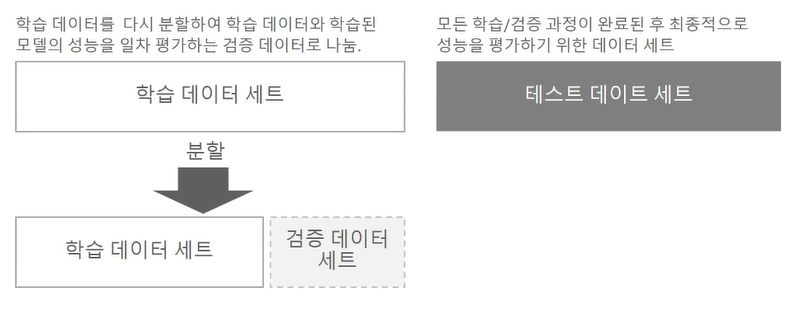

### 1. K-Fold와 Stratified K-Fold

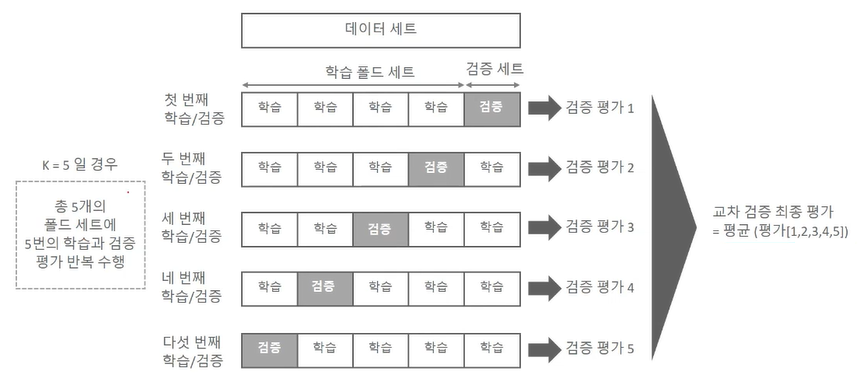

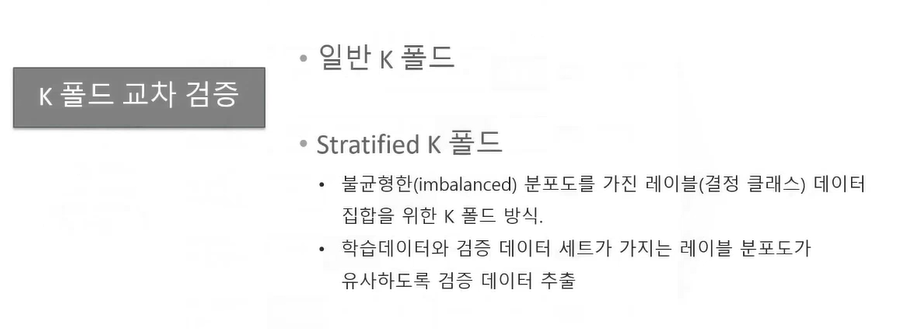

###    * K-Fold

#### 필요한 모듈 로딩

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
import numpy as np

#### 붓꽃 데이터 로딩, KFold 객체 생성

In [13]:
# 붓꽃 데이터 로딩
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []

print("붓꽃 데이터 세트 크기: ", features.shape[0])

붓꽃 데이터 세트 크기:  150


#### KFold로 5번 

In [17]:
n_iter = 0


# KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의
# 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()로 반환된 index를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습, 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    # 정확도, 검증 세트 출력
    print("\n#{0} 교차검증 정확도: {1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}"
         .format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스: {1}".format(n_iter, test_index))
    
    # 리스트에 정확도 append
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합해 평균 정확도 계산
print("\n ## 평균 검증 정확도: ", np.mean(cv_accuracy))


#1 교차검증 정확도: 1.0, 학습데이터 크기: 120, 검증데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증 정확도: 0.9667, 학습데이터 크기: 120, 검증데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증 정확도: 0.8667, 학습데이터 크기: 120, 검증데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증 정확도: 0.9333, 학습데이터 크기: 120, 검증데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증 정확도: 0.7333, 학습데이터 크기: 120, 검증데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 ## 평균 검증 정확도:  0.9


### * Stratified K-Fold

#### target값 분포 확인

import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

#### 비교) K-Fold에서의 데이터 분포

In [21]:
kfold = KFold(n_splits=3)

n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print("\n\n## 교차 검증: {0}".format(n_iter))
    print("학습 label 데이터 분포 : \n", label_train.value_counts())
    print("\n검증 label 데이터 분포 : \n", label_test.value_counts())



## 교차 검증: 1
학습 label 데이터 분포 : 
 2    50
1    50
Name: label, dtype: int64

검증 label 데이터 분포 : 
 0    50
Name: label, dtype: int64


## 교차 검증: 2
학습 label 데이터 분포 : 
 2    50
0    50
Name: label, dtype: int64

검증 label 데이터 분포 : 
 1    50
Name: label, dtype: int64


## 교차 검증: 3
학습 label 데이터 분포 : 
 1    50
0    50
Name: label, dtype: int64

검증 label 데이터 분포 : 
 2    50
Name: label, dtype: int64


#### 비교) Stratified K-Fold에서의 데이터 분포

In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print("\n\n## 교차 검증: {0}".format(n_iter))
    print("학습 label 데이터 분포 : \n", label_train.value_counts())
    print("\n검증 label 데이터 분포 : \n", label_test.value_counts())



## 교차 검증: 1
학습 label 데이터 분포 : 
 2    34
1    33
0    33
Name: label, dtype: int64

검증 label 데이터 분포 : 
 1    17
0    17
2    16
Name: label, dtype: int64


## 교차 검증: 2
학습 label 데이터 분포 : 
 1    34
2    33
0    33
Name: label, dtype: int64

검증 label 데이터 분포 : 
 2    17
0    17
1    16
Name: label, dtype: int64


## 교차 검증: 3
학습 label 데이터 분포 : 
 0    34
2    33
1    33
Name: label, dtype: int64

검증 label 데이터 분포 : 
 2    17
1    17
0    16
Name: label, dtype: int64


#### Stratified K-Fold로 검증

In [23]:
dt_clf = DecisionTreeClassifier(random_state=156)
skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 label 데이터 셋도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습, 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    # 정확도, 검증 세트 출력
    print('\n#{0} 교차검증 정확도 :{1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    # 리스트에 정확도 append
    cv_accuracy.append(accuracy)
    
    
# 교차 검증별 정확도, 평균 정확도 계산
print("\n\n## 교차 검증별 정확도: ", np.round(cv_accuracy, 4))
print("## 평균 검증 정확도: ", np.mean(cv_accuracy))


#1 교차검증 정확도 :0.98, 학습데이터 크기: 100, 검증데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차검증 정확도 :0.94, 학습데이터 크기: 100, 검증데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차검증 정확도 :0.98, 학습데이터 크기: 100, 검증데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


## 교차 검증별 정확도:  [0.98 0.94 0.98]
## 평균 검증 정확도:  0.9666666666666667


### 2. cross_val_score() 로 교차검증을 간편하게!

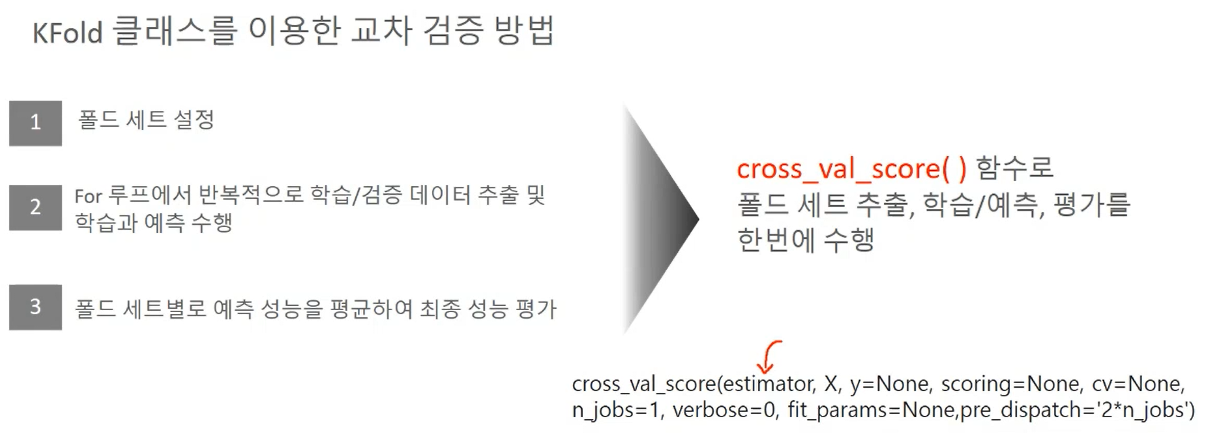

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개
scores= cross_val_score(dt_clf, data, label, scoring="accuracy", cv=3)
print("교차 검증별 정확도: ", np.round(scores, 4))
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


### 3. GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에

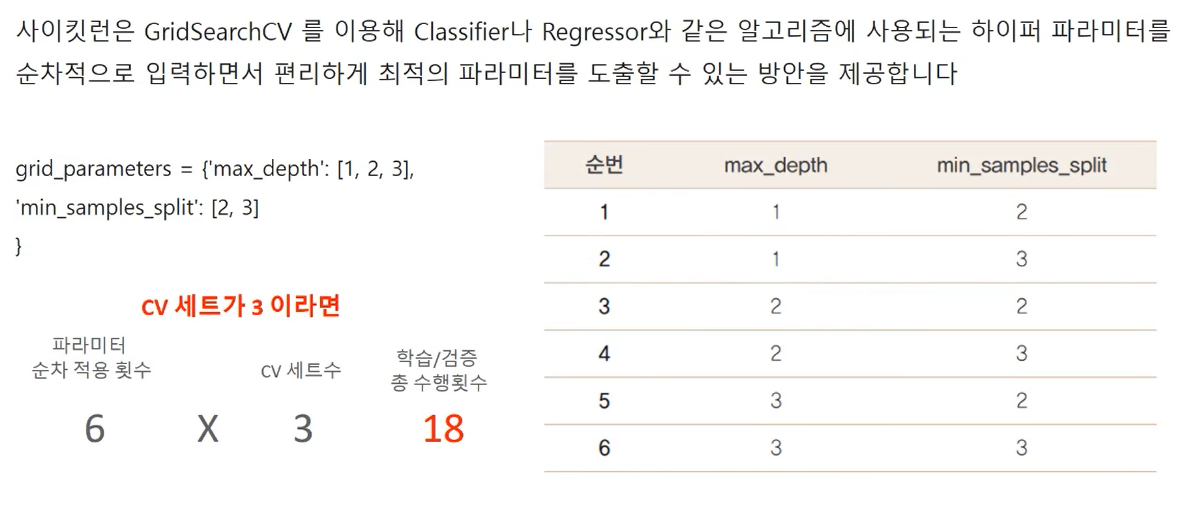

#### 데이터 로딩, 학습/테스트 데이터 분리, 파라미터들을 dictionary로 설정

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로딩, DecisionTreeClassifier 객체 생성
iris = load_iris()
dtree = DecisionTreeClassifier()

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=121)

# 파라미터들을 dictionary형태로 설정
parameters = {"max_depth":[1,2,3], "min_samples_split":[2,3]}

In [28]:
import pandas as pd

# param_grid의 하이퍼파라미터들은 3개의 train, test세트 폴드로 나누어서 test 수행 설정
# refit=True가 default. True이면 가장 좋은 파라미터 설정으로 재 학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, 
                          cv=3, refit=True, return_train_score=True)

# 붓꽃 train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습, 평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [29]:
grid_dtree.cv_results_

{'mean_fit_time': array([8.59498978e-04, 6.65187836e-04, 1.01455053e-03, 3.90052795e-04,
        7.88370768e-05, 6.13530477e-04]),
 'std_fit_time': array([1.48596695e-04, 4.70359192e-04, 2.35478499e-05, 3.52788179e-04,
        1.11492463e-04, 4.37928586e-04]),
 'mean_score_time': array([0.00066034, 0.00042661, 0.00020639, 0.0006752 , 0.00065796,
        0.00068283]),
 'std_score_time': array([0.00046697, 0.00042873, 0.00029188, 0.00047766, 0.00046577,
        0.00048442]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [30]:
print("GridSearchCV 최적 파라미터: ", grid_dtree.best_params_)
print("GridSearchCV 최고 정확도: {0: .4f}".format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.9750
테스트 데이터 세트 정확도: 0.9667


In [31]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
